# Introduction to OpenCV - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it, Alex Costanzino, alex.costanzino@studio.unibo.it

## Exercise 1: Invert Grayscale Image

####  Compute the *“negative”* of a  grayscale image (range of each pixel between [0 255]).  For each pixel having intensity I, modify its the value: 255-I. Download *"grayscale.jpg"* and test the program on it.

('Read the image with shape: ', (1080, 1920))


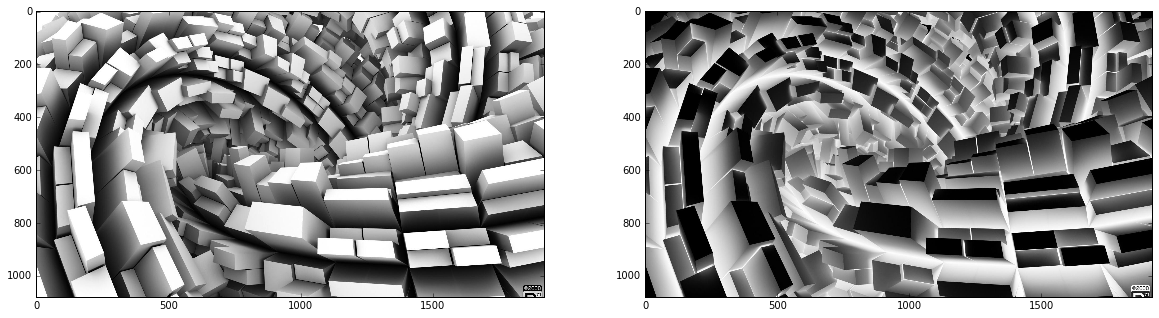

In [93]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image
gray = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)
print("Read the image with shape: ", gray.shape)

# Invert image
copy_gray = np.copy(gray)
copy_gray = 255 - gray

# Display Image
# Adjusting the figsize for better visualization
plt.figure(figsize=(20,10))
# Plotting the original and modified images
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(copy_gray, cmap='gray', vmin=0, vmax=255)
plt.show()

## Exercise 2: Invert RGB Image

#### Same as before, but in this case we want to compute the negative of a color image. The image has 3 channels, representing the 3 RGB values the intensity of each channel ranges between [0 255]. For each image pixel, we need to substitute the (B,G,R) triplet with its «inverse» *(255-B, 255-G, 255-R)*.  Download *"avengers.png"*and test the program on it.

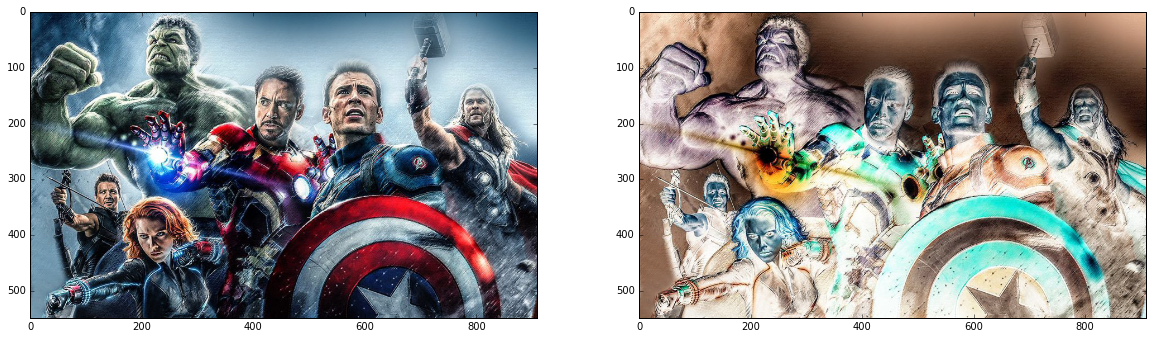

In [94]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image
bgr_image = cv2.imread("avengers.png")

# Invert image
rgb_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2RGB)
copy_image = np.copy(rgb_image)
copy_image = 255 - rgb_image

# Display Image
# Adjusting the figsize for better visualization
plt.figure(figsize=(20,10))
# Plotting the original and modified images
plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.subplot(1,2,2)
plt.imshow(copy_image)
plt.show()

## Exercise 3: Differences between Images

#### 1: Compute the pixel-wise difference between two pictures: Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.

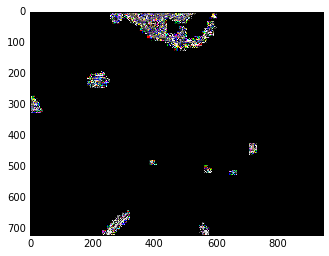

In [95]:
%matplotlib inline 
# Write here your solution
# Import libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read images
image1 = cv2.imread("Differences/differences1.png")
image2 = cv2.imread("Differences/differences2.png")

# Perform Difference
abs_diff = np.abs(image1 - image2)

# Display Image
plt.imshow(cv2.cvtColor(abs_diff, cv2.COLOR_BGR2RGB))
plt.show()

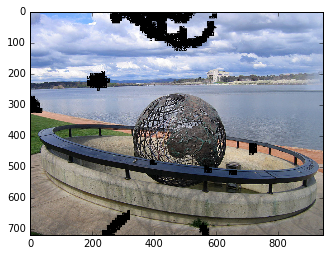

In [96]:
# Compute mean difference along last axis and mask image based on threshold
mean_rgb_diff = np.mean(abs_diff, axis=-1)
output_image = np.copy(image1)
output_image[mean_rgb_diff > 0] = 0

# Display Image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
# Save image on disk
cv2.imwrite("spot_the_difference.png", output_image)

True

## Exercise 4 [OPTIONAL]: Classify 7-Segments Display Digits

#### Classify a digits of the 7-segment display. 

<img src="7segments.png" width="128" height="256">

#### In a 7-segment display each segment can be ON or OFF. In a binary image we identify 255 (white) as ON and 0 (black) as OFF. The order of the 7-segments is depicted in the image above. To understand the image location of the segments refer to sample images (1.png, ..., 9.png).

#### The combination of ON and OFF segments allows the display to show all possible digits from 0 to 9. A segment is defined ON if there are only white pixels (255) in that portion of an image. In test images each segment have a width of 20 pixels and an height of 128 pixels. Given a 256x128 digit image classify the correct number.

#### It is enough that the algorithm works on example images (a general solution is not required).

#### Test the program on digits images (1.png,  ..., 9.png). 

#### Tips (Only if you need help): 
* Identify the correct location (rows, columns range) for each segment based on example images (1.png, 2.png, etc). 
* Understand which segment is ON and OFF and save the status of each segment.
* Based on which segment is active look for the right digit.

('Active segments are: ', [1, 1, 1, 1, 0, 1, 1])
('The digits in the image is: ', 9)
---
Testing over all digits ... 
The solution is correct.
---


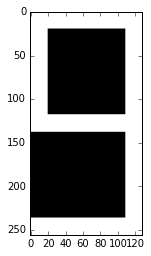

In [98]:
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Dictionary of ON segments for each possible digit. 
# The order follows the scheme of the image above.
# For instance, digit 1 have only the segments 2 and 5 ON (1) while the others OFF (0). 
SEGMENTS_DIGITS = {
(1, 1, 1, 0, 1, 1, 1): 0,
(0, 0, 1, 0, 0, 1, 0): 1,
(1, 0, 1, 1, 1, 0, 1): 2,
(1, 0, 1, 1, 0, 1, 1): 3,
(0, 1, 1, 1, 0, 1, 0): 4,
(1, 1, 0, 1, 0, 1, 1): 5,
(1, 1, 0, 1, 1, 1, 1): 6,
(1, 0, 1, 0, 0, 1, 0): 7,
(1, 1, 1, 1, 1, 1, 1): 8,
(1, 1, 1, 1, 0, 1, 1): 9
}

class Classifier():
    def __init__(self):
        self.segments = []
        self._init_segments()
    def _init_segments(self):
        self.segments.append([0, 20, 0, 128])
        self.segments.append([0, 128, 0, 20])
        self.segments.append([0, 128, -20, 128])
        self.segments.append([118, 138, 0, 128])
        self.segments.append([128, 256, 0, 20])
        self.segments.append([128, 256, -20, 128])
        self.segments.append([-20, 256, 0, 128])
        
    def get_active_segments(self, img):
        active_segments = []
        for i in range(7):
            active_segments.append(self.check_segment(img, self.segments[i]))
        return active_segments
            
    def check_segment(self, img, seg_pos):
        values_sum = np.sum(img[seg_pos[0]:seg_pos[1], seg_pos[2]:seg_pos[3]])
        if values_sum == self.get_sum_segment():
            return 1
        else:
            return 0
            
    def get_sum_segment(self):
        # Total number of pixels per segment
        pixels_per_segment = 20 * 128
        # Total sum of pixel values per segment
        segment_values_sum = pixels_per_segment * 255
        return segment_values_sum

    def alternative_check_segment(self, img, seg_pos):
        zero_if_active = np.sum(255 - img[seg_pos[0]:seg_pos[1], seg_pos[2]:seg_pos[3]])
        if zero_if_active != 0:
            return 0
        else:
            return 1

# For a faster comprehension read the simple test code portion first.
def test(get_active_segments_function):
    for i in range(10):
        image = cv2.imread('Digits/' + str(i) + '.png', cv2.IMREAD_GRAYSCALE)
        if SEGMENTS_DIGITS[tuple(get_active_segments_function(image))] != i:
            print('Failed to classify digit', i)
    print('---\nTesting over all digits ... \nThe solution is correct.\n---')
    

classifier = Classifier()

# A simple test with a single image.
image = cv2.imread("Digits/9.png" ,cv2.IMREAD_GRAYSCALE)

active_segments = classifier.get_active_segments(image)
print("Active segments are: ", active_segments)

# Get the result from the dictionary
result = SEGMENTS_DIGITS[tuple(active_segments)]

# Display Result
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
print("The digits in the image is: ", result)

# A complete test iterating among all images.
test(classifier.get_active_segments)